<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/qpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### *Quantum Phase Estimation*

**CNOT Gate and Phase Kickback** 

<font color="blue">*CNOT-Gate applied to the computational basis 0 and 1*

* https://qiskit.org/textbook/ch-gates/phase-kickback.html

* Main article about Phase Kickback: https://towardsdatascience.com/quantum-phase-kickback-bb83d976a448

The CNOT-gate is a two-qubit gate. Thus, it transforms qubit states whose state we represent by a four-dimensional vector.

>$
|\psi\rangle=\alpha|0\rangle|0\rangle+\beta|0\rangle|1\rangle+\gamma|1\rangle|0\rangle+\delta|1\rangle|1\rangle=\left[\begin{array}{c}
\alpha \\
\beta \\
\gamma \\
\delta
\end{array}\right]
$

Remember Vector-Vector-Multiplikation (Kronecker / tensor product):

> $\mathbf{uv}$ = $\left[\begin{array}{c}u_{1} \\ u_{2}\end{array}\right]$ $\otimes$ $\left[\begin{array}{c}v_{1} \\ v_{2} \end{array}\right]$ = $\left[\begin{array}{l}u_{1}\left[\begin{array}{l}v_{1} \\ v_{2}\end{array}\right] \\ u_{2}\left[\begin{array}{l}v_{1} \\ v_{2}\end{array}\right]\end{array}\right]$=  $\left[\begin{array}{c}u_{1} v_{1} \\ u_{1} v_{2}\\ u_{2} v_{1} \\ u_{2} v_{2}\end{array}\right]$

> $\left[\begin{array}{l}1 \\ 0\end{array}\right]=|0\rangle, \quad\left[\begin{array}{l}0 \\ 1\end{array}\right]=|1\rangle$. 

We choose two qubits in state $|0\rangle$:

> $|0\rangle \otimes|0\rangle = \left[\begin{array}{l}1 \\ 0\end{array}\right] \otimes\left[\begin{array}{l}1 \\ 0\end{array}\right]=$</font> $\left[\begin{array}{l}1\left[\begin{array}{l}1 \\ 0\end{array}\right] \\ 0\left[\begin{array}{l}1 \\ 0\end{array}\right]\end{array}\right]=$ $\left [\begin{array}{l}11 \\ 10 \\ 01 \\ 00\end{array}\right]$ = <font color="gray">$\left [\begin{array}{l}3 \\ 2 \\ 1 \\ 0\end{array}\right]$</font> = <font color="blue">$\left [\begin{array}{l}1 \\ 0 \\ 0 \\ 0\end{array}\right]$ 

Quits in two different states:

> $|0\rangle \otimes|1\rangle = \left[\begin{array}{l}1 \\ 0\end{array}\right] \otimes\left[\begin{array}{l}0 \\ 1\end{array}\right]=\left[\begin{array}{l}1\left[\begin{array}{l}0 \\ 1\end{array}\right] \\ 0\left[\begin{array}{l}0 \\ 1\end{array}\right]\end{array}\right]=\left[\begin{array}{l}0 \\ 1 \\ 0 \\ 0\end{array}\right]$

Accordingly, the CNOT-gate has a $4 \times 4$ transformation matrix.

>$
C N O T=\left[\begin{array}{llll}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}\right]
$

There is no effect if the control qubit (at the left-hand position in the Dirac notation) is in state |0⟩, as in states |00⟩ and |01⟩.

> CNOT $\cdot|00\rangle=\left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right] \cdot\left[\begin{array}{l}1 \\ 0 \\ 0 \\ 0\end{array}\right]=\left[\begin{array}{l}1 \\ 0 \\ 0 \\ 0\end{array}\right]=|00\rangle$

> CNOT $\cdot|01\rangle=\left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 1 \\ 0 \\ 0\end{array}\right]=\left[\begin{array}{l}0 \\ 1 \\ 0 \\ 0\end{array}\right]=|01\rangle$

<font color="blue">But if the control qubit is in state |1⟩, then the controlled (target) qubit switches from |0⟩ to |1⟩ and vice versa.</font>

> CNOT $\cdot|10\rangle=\left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 1 \\ 0\end{array}\right]=\left[\begin{array}{l}0 \\ 0 \\ 0 \\ 1\end{array}\right]=|11\rangle$

> CNOT $\cdot|11\rangle=\left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 0 \\ 1\end{array}\right]=\left[\begin{array}{l}0 \\ 0 \\ 1 \\ 0\end{array}\right]=|10\rangle$

When we describe the quantum states and operations in terms of mathematical formulae, we use the vectors |0⟩ and |1⟩ as a basis. |0⟩ and |1⟩ denote the standard or computational basis states. These states correspond to the possible measurements we might obtain when looking at the qubit. We measure a qubit in state |0⟩ as 0 with absolute certainty. And, we measure a qubit in state |1⟩ as 1, accordingly. While the basis {|0⟩,|1⟩} is convenient to work with mathematically, it is just a representation of the underlying physics.


<font color="blue">*CNOT-Gate applied to the superposition basis + and -*

The mathematical basis we chose leads to a specific representation of the CNOT-transformation. But this is not the only possible representation. In fact, there are infinitely many other possible choices. Our qubits are not limited to these two states. Qubits can be in a superposition of both states. For instance, there are the states that result from applying the Hadamard-gate on the basis states:

> $|+\rangle=\left[\begin{array}{c}\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{array}\right]$ and $|-\rangle=\left[\begin{array}{c}\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{array}\right]$

Remember: Apply Hadamard gate on a qubit that is in the |0> state:

> $\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}1 \\ 0\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \\ 1\end{array}\right]$

Now apply Hadamard gate on a qubit that is in the |1> state:

> $\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}0 \\ 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \\ -1\end{array}\right]$

Mathematically, the following matrix represents the application of Hadamard gates on each of the two qubits.

> $H \otimes H=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}H & H \\ H & -H\end{array}\right]=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right]$

So, if we apply this matrix on two qubits in state |00⟩, they end up in state |++⟩.

> $\begin{aligned} H \otimes H(|00\rangle) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right] \cdot\left[\begin{array}{l}1 \\ 0 \\ 0 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{l}1 \\ 1 \\ 1 \\ 1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle+|0\rangle|1\rangle+|1\rangle|0\rangle+|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \\ &=|++\rangle \end{aligned}$

The input state |01⟩ results in state |+−⟩.

> $\begin{aligned} H \otimes H(|01\rangle) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 1 \\ 0 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ -1 \\ 1 \\ -1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle-|0\rangle|1\rangle+|1\rangle|0\rangle-|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \\ &=|+-\rangle \end{aligned}$

The input state |10⟩ results in state |−+⟩.

> $\begin{aligned} H \otimes H(|10\rangle) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 1 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ 1 \\ -1 \\ -1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle+|0\rangle|1\rangle-|1\rangle|0\rangle-|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \\ &=|-+\rangle \end{aligned}$

Finally, if we apply this transformation on two qubits in state |11⟩, we put them into state |−−⟩.

> $\begin{aligned} H \otimes H(|11\rangle) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 0 \\ 1\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ -1 \\ -1 \\ 1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle-|0\rangle|1\rangle-|1\rangle|0\rangle+|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \\ &=|--\rangle \end{aligned}$

Now, let’s apply the CNOT-gate on qubits in superposition. We can calculate the overall transformation matrix by multiplying the matrices of the CNOT-gate and the H⊗H transformation. The CNOT-gate switches the second and fourth columns of the H⊗H-matrix.

> $\operatorname{CNOT}(H \otimes H)=\left[\begin{array}{cccc}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right] \cdot \frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{array}\right]=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & -1 & -1 & 1 \\ 1 & 1 & -1 & -1\end{array}\right]$

* And now, we apply this transformation to the four combinations of basis states.

<font color="blue">If the target qubit (at the right-hand side) is in state |1⟩, the state of the control qubit (at the left-hand side) flips from |+⟩ to |−⟩ and vice versa:

> 

> $\begin{aligned} \operatorname{CNOT}(H \otimes H(|00\rangle)) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & -1 & -1 & 1 \\ 1 & 1 & -1 & -1\end{array}\right] \cdot\left[\begin{array}{l}1 \\ 0 \\ 0 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{l}1 \\ 1 \\ 1 \\ 1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle+|0\rangle|1\rangle+|1\rangle|0\rangle+|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \\ &=|++\rangle \end{aligned}$

> $\begin{aligned} \operatorname{CNOT}(H \otimes H(|01\rangle)) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & -1 & -1 & 1 \\ 1 & 1 & -1 & -1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 1 \\ 0 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ -1 \\ -1 \\ 1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle-|0\rangle|1\rangle-|1\rangle|0\rangle+|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \\ &=|--\rangle \end{aligned}$

> $\begin{aligned} \operatorname{CNOT}(H \otimes H(|10\rangle)) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & -1 & -1 & 1 \\ 1 & 1 & -1 & -1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 1 \\ 0\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ 1 \\ -1 \\ -1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle+|0\rangle|1\rangle-|1\rangle|0\rangle-|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \\ &=|-+\rangle \end{aligned}$

> $\begin{aligned} \operatorname{CNOT}(H \otimes H(|11\rangle)) &=\frac{1}{2}\left[\begin{array}{cccc}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & -1 & -1 & 1 \\ 1 & 1 & -1 & -1\end{array}\right] \cdot\left[\begin{array}{l}0 \\ 0 \\ 0 \\ 1\end{array}\right]=\frac{1}{2}\left[\begin{array}{c}1 \\ -1 \\ 1 \\ -1\end{array}\right] \\ &=\frac{1}{2}(|0\rangle|0\rangle-|0\rangle|1\rangle+|1\rangle|0\rangle-|1\rangle|1\rangle) \\ &=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \\ &=|+-\rangle \end{aligned}$

In short, we can say:

> $\operatorname{CNOT}(|++\rangle)=|++\rangle$

> $\operatorname{CNOT}(|+-\rangle)=|--\rangle$

> $\operatorname{CNOT}(|-+\rangle)=|-+\rangle$

> $\operatorname{CNOT}(|--\rangle)=|+-\rangle$

The two states |+⟩ and |−⟩ have the same measurement probabilities of |0⟩ and |1⟩. They result in either value with a probability of 0.5. **So, the CNOT-gate does not have any directly measurable implications**. <font color="blue">However, the control qubit switches its phase. It takes on the phase of the controlled (target) qubit.</font>

> For the phase of the target qubit is kicked up to the control qubit, we call this phenomenon phase kickback.

We learned the CNOT-gate is not a one-sided operation. It clearly has the potential to affect the state of the control qubit. Even though the phase is not directly measurable, there are ways to exploit differences in the phase between states. In fact, prominent algorithms, such as Grover’s search algorithm, exploit this effect.


**Quantum Phase Estimation** 

* algorithm for determining the eigenvalues of a unitary operator

* the [quantum phase estimation algorithm](https://en.m.wikipedia.org/wiki/Quantum_phase_estimation_algorithm) (also referred to as quantum eigenvalue estimation algorithm), is a quantum algorithm to estimate the phase (or eigenvalue) of an eigenvector of a unitary operator. 

* More precisely, given a unitary matrix $U$ and a quantum state $|\psi\rangle$ such that $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$, the algorithm estimates the value of $\theta$ with high probability within additive error $\varepsilon$, using $O(\log (1 / \varepsilon))$ qubits (without counting the ones used to encode the eigenvector state) and $O(1 / \varepsilon)$ controlled- $U$ operations. 

* The algorithm was initially introduced by Alexei Kitaev in 1995.

* Phase estimation is frequently used as a subroutine in other quantum algorithms, such as Shor's algorithm and the quantum algorithm for linear systems of equations.

<font color="blue">*One Qubit Phase Estimation (with Hadamard Gate):*

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_117.png)

<font color="blue">*Multi-Qubit Phase Estimation (with inverse Quantum Fourier Transform):*

![gg](https://upload.wikimedia.org/wikipedia/commons/a/a5/PhaseCircuit-crop.svg)

Remember in **Quantum Fourier Transform**: 


> x1 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ 

* <font color="blue">$e^{2\pi i}$ = 1 = identity</font>

* In Quantum Fourier Transform we change the phase <font color="blue">$\theta$ in $e^{2\pi i}$</font> <font color="red">$^{\theta}$</font>

  * <font color="red">= Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩</font>

* Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

* A controlled-R quantum gate applies a relative phase change to |1>. The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**Now in Phase Estimation**: 

> In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ dieser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ mit dem Operator: $U^{2^n} = \phi$

Quantum phase estimation addresses the following problem:
* We have a $n$-qubit oracle function $U$, encoded in the form of a controlled- $U$ unitary.
* **$U$ has an eigenvalue $e^{2 \pi i \phi}$, associated with an eigenvector $|u\rangle$ which we can prepare.**
* <font color="red">**We wish to estimate the phase, $\phi$, of the eigenvalue to $t$ bits of precision.**

> <font color="blue">**Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$** $\quad$ (based on Eigenvalue equation)</font>

* Here $|\psi\rangle$ is an eigenvector / eigenstate and $e^{2 \pi i \theta}$ is the corresponding eigenvalue. 

* <font color="red">For example: the eigenvalues of X are −1 and 1 and have the eigenvectors |−⟩ and |+⟩ respectively.*</font>

*Since $U$ is unitary, all of its eigenvalues have a norm of 1.*

Reminder: QFT

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_084.png)

>**See below: <font color="red">Remember that a unitary matrix has eigenvalues of the form $e^{i \theta_{\psi}}$ (ohne $2 \pi$ wie oben bei QFT) and that it has eigenvectors that form an orthonormal basis**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_083.png)

The problem: in both cases the probability is 0,5, just differs by the phase added: $=e^{\frac{i \pi}{2}}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_078.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_079.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_080.png)

**The probability of measuring 0 and 1 is each 0,5, but there is a small factor that makes them differ from 0,5, depending on the phase (angle):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_081.png)

> **In the different between the probability of measuring 0 or 1, you've encoded that phase! (In other words: you've taken that phase information and turned it into and amplitude that you can measure.**

* How to do this experimentally: you do a million shots of the experiment, collect statistics and check what the statistics say. How many times did I get zero? How many times did I get one? The hope is that the difference between the statistics of zero and one would allow us to back out theta

* Next level: now getting more precision with more qubits: (there is another circuit to prepare Psi yet, which is assumed to be given here)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_082.png)

writing out the calculation:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_085.png)

**Comparing QPE with QFT (QPE is the same as QFT with a different phase):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_086.png)

It's like applying a QFT of something (of a special phase $\frac{\theta_{\psi}}{2^{n}} 2 \pi$, the green box above!), and in order to get back to the original state you need to apply an inverse QFT at the end:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_087.png)

*Step 1: Set up the unitary and number of bits to use in phase estimation*

<font color="blue">*Let's take as an example the T-gate, and use Quantum Phase Estimation to estimate its phase.*

You will remember that the $T$-gate adds a phase of $e^{\frac{i \pi}{4}}$ to the state $|1\rangle$ :

$
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$

Since QPE will give us $\theta$ where: $
T|1\rangle=e^{2 i \pi \theta}|1\rangle
$

<font color="red">We expect to find theta: $
\theta=\frac{1}{8}
$

We first perform a Hadamard gate on the first qubit to get the state 

  * Original state of both qubits: $|0\rangle \otimes|\psi\rangle$
  
  * Hadamard on first qubit: $|+\rangle \otimes|\psi\rangle$ =
  
  * <font color="red">Distribute superposition: $|0\rangle|\psi\rangle+|1\rangle|\psi\rangle$</font>

  * <font color="blue">this part above is the rule from tensor products: If the state of the first particle is a superposition of two states, the state of the two-particle system is also a superposition: $\left(v_{1}+v_{2}\right) \otimes w=v_{1} \otimes w+v_{2} \otimes w$
</font>

    * The Hadamard states ∣+⟩ and ∣−⟩ are considered superposition states because they are a combination of the two computational states:

    * State: $|\pm\rangle=\frac{1}{\sqrt{2}}|0\rangle \pm \frac{1}{\sqrt{2}}|1\rangle$ so for + it is: $|\+\rangle=\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$

  * we have intentionally omitted the normalization factor of 1/√2 for clarity

> $|+\rangle \otimes|\psi\rangle = \frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \\ 1\end{array}\right] \otimes\left[\begin{array}{l}\psi\end{array}\right]= \frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \, [\psi] \\ 1 \, [\psi]\end{array}\right]$

Remember: Apply Hadamard gate on a qubit that is in the |0> state:

> $|+\rangle$ = $\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}1 \\ 0\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{l}1 \\ 1\end{array}\right]$ =  $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$

In [ ]:
# Value of θ which appears in the definition of the unitary U above.
# Try different values.
theta = 0.125

# Define the unitary U-Gate:
U = cirq.Z ** (2 * theta)

# Accuracy of the estimate for theta. Try different values.
n_bits = 3

Here details about unitary U-Gate: 

$U$ = $Z^{2^{n-n}}$ 

Z = $e^{\pi}$ 

* $Z$ entspricht $\pi$ (ein halber Kreis, zB von +1 zu -1 auf X-Achse) 


then:

> <font color="blue">$U$ = $e^{\pi * 2^{n-n}}$


*Step 2: Build the first part of the circuit for phase estimation with controlled U-gate (Phase Kickback)*

We then perform a controlled U operation, which we have written as $U^{2^0}$. Here applies the **Phase Kickback!**

  * $|0\rangle|\psi\rangle+|1\rangle$ <font color="red">$U$</font> $|\psi\rangle$ =

  * $|0\rangle|\psi\rangle+$ <font color="red">$e^{2 \pi i 0. \phi_{1}}$</font> $|1\rangle|\psi\rangle$ =

  * $|0\rangle+$ <font color="red">$e^{2 \pi i 0. \phi_{1}}$</font> $|1\rangle) \otimes|\psi\rangle$

* Here are 2 things very important: 
  
    * The second qubit register containing |ψ⟩ hasn’t changed. We shouldn’t expect it to, **since |ψ⟩ is an eigenstate of U (Remember: <font color="blue">**Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$ based on the Eigenvalue equation**</font>). Thus, no matter how many times we apply U to this register, nothing happens to |ψ⟩**. But if we apply it more often it will 'amplify' the phase (Not in the sense of amplitude amplification) - we amplify it with adding more qubits and hence more $\phi$ to get more precision
    
    * what’s the point of applying U then? The effect was that **it wrote some information about the eigenvalue into the relative phase of the first qubit**. Namely, the entire effect was to
map: $|0\rangle+|1\rangle \mapsto|0\rangle+e^{2 \pi i 0. \phi_{1}}|1\rangle$

In [ ]:
# Get qubits for the phase estimation circuit.
qubits = cirq.LineQubit.range(n_bits)
u_bit = cirq.NamedQubit('u')

# Build the first part of the phase estimation circuit.
phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

# Set the input state of the eigenvalue register: Add gate to change initial state to |1>
phase_estimator.insert(0, cirq.X(u_bit))

# bit = cirq.LineQubit
for i, bit in enumerate(qubits):
    phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - i - 1)))
    # explanation: U-rot control aktiviert wenn entsprechendes qubit in state 1 (??)
    # dann aktiviere formel: U^2^(n-1) ...U^2^(n-2) ...U^2^(n-n)

print(phase_estimator)

0: ───H───@───────────
          │
1: ───H───┼───@───────
          │   │
2: ───H───┼───┼───@───
          │   │   │
u: ───X───Z───S───T───


> <font color="blue">$U$ = $Z^{2^{n-n}}$ = $e^{\pi * 2^{n-n}}$ fur das erste Gate: = $e^{\pi * (-0.128)}$ ????


*Why are we adding Pauli-X? The initial state for u_bit is the  state, but the phase for this state is trivial with the operator we chose. Inserting a Pauli  operator at the begining of the circuit changes this to the  state, which has the nontrivial  phase.*

*The controlled u gate*:

$|00\rangle \mapsto|00\rangle$

$|01\rangle \mapsto|01\rangle$

$|10\rangle \mapsto|1\rangle \otimes U|0\rangle=|1\rangle \otimes\left(u_{00}|0\rangle+u_{10}|1\rangle\right)$

$|11\rangle \mapsto|1\rangle \otimes U|1\rangle=|1\rangle \otimes\left(u_{01}|0\rangle+u_{11}|1\rangle\right)$

The matrix representing the controlled $U$ is

>$
\mathrm{C} U=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}
\end{array}\right]
$

**When U is one of the Pauli operators, X,Y, Z, the respective terms "controlled-X", "controlled-Y", or "controlled-Z" are sometimes used**. 
Sometimes this is shortened to just CX, CY and CZ.

<font color="blue">*Why should we use more than one control Qubit?*

**Remember from Eigenvalue problem: Ax = λx in our case with the unitary operator: Ux = λx**

> $Ux =$ <font color="red">$e^{2πi*0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} }$</font> $x$

> Beispiel: Wenn $0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} = 0$, dann ist $e^{2πi*0}$ = λ = 1, so dass Ux = 1x. Damit ist λ = 1 ist der Eigenwert von f.

* Since |λ| = 1, we can write it without loss of generality as λ = $e^{2πiφ}$, where <font color="red">$e^{2πi}$ = 1 (= identity, if you insert 2*π*i into exponent at random, you will not change the result. Sometimes it can be a useful identity [Source](https://www.physicsforums.com/threads/e-2-pi-i-where-from.430393/), from Euler identity)</font> and **0 ≤ φ ≤ 1 is called the phase. This is what we want to estimate!**

* We saw that in QFT, φ being between 0 and 1 $\rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}$

> **The term “estimation” comes about not from the fact that quantum computation is probabilistic, but rather in the degree of precision that we are going to compute, or estimate, the phase to.**

* The phase φ is going to be between zero and one, so we can write it as a decimal in binary notation as follows: $φ = 0.φ_1 φ_2 ···φ_n$, where each φi is either zero or one

  * The expression $\phi=0 . \phi_{1} \phi_{2} \cdots \phi_{n}$ is equivalent to $\phi=0 . \phi_{1} \phi_{2} \cdots \phi_{n} \Longleftrightarrow \phi=\sum_{k=1}^{n} \phi_{k} 2^{-k}$. Some numbers as binary decimals: 
  
    * <font color="blue">The number 0.5 in decimal is 0.1 in binary, since 0.1 ≡ (1) · $2^{−1}$ = 1/2 = 0.5. So: $0.5_{10} = 0.1_2$. Note that 0.1 is the same as 0.100000....</font>

    * <font color="blue">The number 0.75 in decimal is 0.11 in binary, since 0.11 ≡ (1)·$2^{−1}$ +1·$2^{−2}$ = 1/2+1/4 = 3/4 = 0.75. To get this we need 2 Qubits. So we get more precision with more qubits</font>

    * 0.111 = 0.875

    * 0.1111 = 0.9375 in decimal, because: $0 \cdot 2^{0}+1 \cdot 2^{-1}+1 \cdot 2^{-2}+1 \cdot 2^{-3}+1 \cdot 2^{-4}=0 \cdot 1+1 \cdot 0.5+1 \cdot 0.25+1 \cdot 0.125+1 \cdot 0.0625=0+0.5+0.25+0.125+0.0625=0.937510$

  * Check also what is the value of the infinitely repeating binary decimal 0.1111111...
  
  * If it needed to be proved, the above exercise proves that 0 ≤ 0.φ1φ2 · · · ≤ 1


*Operator $U^{2^n}$ in QPE*

* $U^{2^0}$: 1 (decimal) = 00001

* $U^{2^1}$: 2 (decimal) = 00010

* $U^{2^2}$: 4 (decimal) = 00100

* $U^{2^3}$: 8 (decimal) = 01000

* $U^{2^4}$: 16 (decimal) = 10000


**So for falls die Phase 0.111 ist, wuerde bei 3 Qubits QPE berechnen:**

* $e^{2 \pi i 0. \varphi_{1} \varphi_{2} \varphi_{3}}$</font> = $e^{2 \pi i 0.(U^{2^0} + U^{2^1} + U^{2^2})}$  = <font color="red">$e^{2 \pi i 0.001 + 010 + 100)}$</font>  = $e^{2 \pi i 0.111}$

  * $2^0$ = 1 in decimal = 001 in binary

  * $2^1$ = 2 in decimal = 010 in binary

  * $2^2$ = 4 in decimal = 100 in binary

* in this case the phase $\theta$ = 0.111


**Compare that with Quantum Fourier Transform:**

* In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ dieser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ 

* Let's say all $x_1, x_2$ and $x_3$ = 1 $\rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{{1}}{2}+\frac{1}{4}+\frac{1}{8}\right)}$ = $\mathrm{e}^{2 \pi \mathrm{i}(0.5+0.25+0.125)}$ and in binary form: <font color="red">$\mathrm{e}^{2 \pi \mathrm{i}(0.100+0.010+0.001)}$</font>

* **We see that in QFT and QPE it's the same (both in red)!**

<font color="red">Jedes $U^{2^n}$ wird immer dann aktiviert, wenn im Control-Qubit oben eine 1 gemessen wird (siehe Bild hier unten):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_118.png)

*Step 3: Perform the inverse QFT on the estimation qubits and measure them*


How can we read out this information from the quantum state? Consider the effect of applying another Hadamard transformation on the first qubit (without another H we will always measure 50/50 % a 0 or 1), which will produce (ignoring the normalization factor of 1/2): 

  * $H(|0\rangle+$ <font color="red">$e^{2 \pi i 0 \cdot \phi_{1}}$</font> $|1\rangle)=$ $(1+$<font color="red">$e^{2 \pi i 0. \phi_{1}}$</font>$)|0\rangle$ + $(1-$<font color="red">$e^{2 \pi i 0 . \phi_{1}}$</font>$)|1\rangle$

  * this shares the phase with the first Qubit and allows us to read it out

  * Now, $\phi_{1}$ can only be zero or one. In the case that $\phi_{1}=0, e^{2 \pi i 0 . \phi_{1}}=1$, hence the state is exactly $|0\rangle$: $(\frac{1}{2}\left(1+e^{2 \pi i 0 . 0}\right)|0\rangle+\frac{1}{2}\left(1-e^{2 \pi i 0 . 0}\right)|1\rangle$ = $\frac{1}{2}\left(1+1\right)|0\rangle+\frac{1}{2}\left(1-1\right)|1\rangle$ = $|0\rangle$

  * these values in front of $|0\rangle$ and $|1\rangle$ are probabilities (here 0 has probability of being measured = 1, but small differences her reveal the phase and hence the Eigenvalue in other cases. See here:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_081.png)

* **For 1 Qubit we can use a Hadamard Gate, and for more than 1 Qubit we use the inverse Fourier Transform**: on Quantum Phase Estimation $\frac{1}{2^{\frac{n}{2}}} \sum_{k=0}^{2^{n}-1} e^{2 \pi i \theta k}$ then the inverse Quantum Fourier transform:  <font color="red">$ \frac{1}{2^{\frac{n}{2}}} \sum_{x=0}^{2^{n}-1} e^{\frac{-2 \pi i k x}{2^{n}}}|x\rangle$</font> so that: $\frac{1}{2^{\frac{n}{2}}} \sum_{k=0}^{2^{n}-1} e^{2 \pi i \theta k}$ <font color="red">$ \frac{1}{2^{\frac{n}{2}}} \sum_{x=0}^{2^{n}-1} e^{\frac{-2 \pi i k x}{2^{n}}}|x\rangle$</font>

  * inverse QFT for 1 Qubit is: $ \frac{1}{2^{\frac{1}{2}}} \sum_{x=0}^{2^{1}-1} e^{\frac{-2 \pi i k x}{2^{1}}}|x\rangle$ = $\frac{1}{\sqrt{2}} e^{-1 \pi i k x}$ fur $k$ = $\varphi$ = 0 and $x$ = 0. --> somehting is not right here yet!

Thus, we measure with certainty (i.e., not probabilistically) a state that tells us exactly what the phase,
and hence the eigenvalue, is.

In [ ]:
def make_qft_inverse(qubits):
    """Generator for the inverse QFT on a list of qubits."""
    qreg = list(qubits)[::-1]
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

# Do the inverse QFT
phase_estimator.append(make_qft_inverse(qubits[::-1]))

# Add measurements to the end of the circuit
phase_estimator.append(cirq.measure(*qubits, key='m'))
print(phase_estimator)

                           ┌────────┐
0: ───H───@───H───@─────────@────────────────────────M('m')───
          │       │         │                        │
1: ───H───┼───@───@^-0.5────┼──────H────@────────────M────────
          │   │             │           │            │
2: ───H───┼───┼───@─────────@^-0.25─────@^-0.5───H───M────────
          │   │   │
u: ───X───Z───S───T───────────────────────────────────────────
                           └────────┘


In [ ]:
# Syntax explanation for list(qubits)[::-1]: list[<start>:<stop>:<step>]
# So, when you do a[::-1], it starts from the end towards the first taking each element. 
# So it reverses a. This is applicable for lists/tuples as well.
# Example: >>> a = '1234' >>> a[::-1] will get you: '4321'

*Step 4: Simulate the circuit and convert from measured bit values to estimated θ values*

In [ ]:
# Simulate the circuit.
sim = cirq.Simulator()
result = sim.run(phase_estimator, repetitions=10)

# Convert from output bitstrings to estimate θ values.
theta_estimates = np.sum(2 ** np.arange(n_bits) * result.measurements['m'], axis=1) / 2**n_bits
print(theta_estimates)

[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


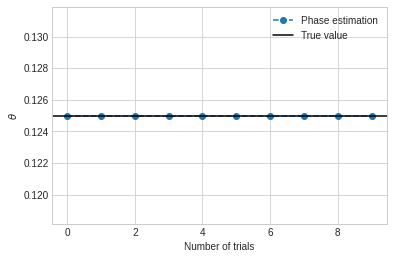

In [ ]:
"""Plot the results."""
plt.style.use("seaborn-whitegrid")

plt.plot(theta_estimates, "--o", label="Phase estimation")
plt.axhline(theta, label="True value", color="black")

plt.legend()
plt.xlabel("Number of trials")
plt.ylabel(r"$\theta$");

In [ ]:
def phase_estimation(theta, n_bits, n_reps=10, prepare_eigenstate_gate=cirq.X):
    # Define qubit registers.
    qubits = cirq.LineQubit.range(n_bits)
    u_bit = cirq.NamedQubit('u')

    # Define the unitary U.
    U = cirq.Z ** (2 * theta)

    # Start with Hadamards on every qubit.
    phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

    # Do the controlled powers of the unitary U.
    for i, bit in enumerate(qubits):
        phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - 1 - i)))

    # Do the inverse QFT.
    phase_estimator.append(make_qft_inverse(qubits[::-1]))

    # Add measurements.
    phase_estimator.append(cirq.measure(*qubits, key='m'))

    # Gate to choose initial state for the u_bit. Placing X here chooses the |1> state.
    phase_estimator.insert(0, prepare_eigenstate_gate.on(u_bit))

    # Code to simulate measurements
    sim = cirq.Simulator()
    result = sim.run(phase_estimator, repetitions=n_reps)

    # Convert measurements into estimates of theta
    theta_estimates = np.sum(2**np.arange(n_bits)*result.measurements['m'], axis=1)/2**n_bits

    return theta_estimates

In [ ]:
"""Analyze convergence vs n_bits."""
# Set the value of theta. Try different values.
theta = 0.123456

max_nvals = 16
nvals = np.arange(1, max_nvals, step=1)

# Get the estimates at each value of n.
estimates = []
for n in nvals:
    estimate = phase_estimation(theta=theta, n_bits=n, n_reps=1)[0]
    estimates.append(estimate)

print(theta_estimates)
print(estimates)

"""Plot the results."""
plt.style.use("seaborn-whitegrid")

plt.plot(nvals, estimates, "--o", label="Phase estimation")
plt.axhline(theta, label="True value", color="black")

plt.legend()
plt.xlabel("Number of bits")
plt.ylabel(r"$\theta$");

*Step 5: Compute the Eigenvalues from the theta value*

Eigenvalue: $e^{2 \pi i \theta}$ is the corresponding eigenvalue, so for $\theta$ = 0.125 $\rightarrow$ $e^{2 * \pi * i * 0.125}$ = <font color="blue">0.707106781 + 0.707106781 i (Eigenvalue of T-gate)</font>

* Verification: $
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$ $\rightarrow$ <font color="blue">$e^{\frac{i \pi}{4}}$ is the same as $e^{2 * \pi * i * 0.125}$ bzw. $e^{\frac{2 * \pi * i}{8}}$</font>

* $e^{2 \pi i 0. \varphi_{1} \varphi_{2} \varphi_{3}}$</font> = $e^{2 \pi i 0.(U^{2^0} + U^{2^1} + U^{2^2})}$  = <font color="red">$e^{2 \pi i 0.001 + 010 + 100)}$</font>  = $e^{2 \pi i 0.111}$

* ps: $e^{2 \pi i}$ =  1 (identity) - ohne theta, die phase

* From Eigenvalue euqation: $Ux =$ <font color="red">$e^{2πi*0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} }$</font> $x$. Beispiel: Wenn $0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} = 0$, dann ist $e^{2πi*0}$ = λ = 1, so dass Ux = 1x. Damit ist λ = 1 ist der Eigenwert von f.

* https://quantumcomputing.stackexchange.com/questions/9577/how-to-find-eigenvalues-and-eigenvector-for-a-quantum-gate


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_115.png)
